In [1]:
#imports
from IPython.display import Image, Audio
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy import signal
import numpy as np
from librosa import load, display, feature
import pandas as pd

In [2]:
#This function loads the audio file and returns the sample array and sample rate.
def loadAudio(file):
    (x, fs) = load("../uploaded_audio/" + file)
    #This normalizes the array.
    x = x/np.abs(x.max())
    return x, fs

In [3]:
#Listen to audio here.
[x, fs] = loadAudio("TheBlackKeys_track4.wav")
Audio(x, rate=fs)

In [4]:
#This function uses the chormogram feature from librosa. The chromogram returns a 2D array of twelve
#evenly-numbered longer arrays. Each array represents a chromatic tone. We used set theory, and numbered them from 0 - 11
#where 0 is C. Then, we found which of those notes had spectral engery readings of 1. This means that those notes are 
#prevalent in the audio sample (it could also represent harmonics). 
def getNotesFromAudio(x):
    #Turns x's values into floats
    x = x.astype(float)
    #Creates the chormagram
    chromagram = feature.chroma_stft(y=x, n_fft=16384,sr=22050, hop_length=2048)
    #Creates an empty array
    notes = np.array([])
    for i in range(12):
        for j in range(chromagram[i].size):
            #Goes through each array for each chromatic tone and checks if there's a 1. 
            counter = 0
            if chromagram[i][j] == 1:
                #Adds it to the array if it contains 1
                num = np.array([i])
                notes = np.concatenate([notes, num])
    return notes

In [5]:
#This is a similar function, but instead of returning the tones multiple times (if there are multiple ones), it stops
#after it finds one 1. This results in the same array but with no duplicates.
def getSingleNotesFromAudio(x):
    x = x.astype(float)
    chromagram = feature.chroma_stft(y=x, n_fft=16384,sr=22050, hop_length=2048)
    singleNotes = np.array([])
    for i in range(12):
        for j in range(chromagram[i].size):
            counter = 0
            if chromagram[i][j] == 1:
                num = np.array([i])
                singleNotes = np.concatenate([singleNotes, num])
                break
    return singleNotes

In [6]:
#This function takes the notes from the getNotesFromAudio function and counts the number of each. 
def findPercentages(notes):
    #sets counter
    counter = 1
    #creates empty array
    arrayOfCounts = np.array([])
    #gets the first value
    num = notes[0]
    for i in range(notes.size - 1):
        #if the next note equals the first note and you're not at the end of the array yet, add 1 to the counter
        if ((notes[i + 1] == num) and (i != notes.size - 2)):
            counter = counter + 1
        #otherwise, if you reached the end of the notes array, put the count into a total array
        else:
            if (i == notes.size - 2):
                count = np.array([counter + 1])
                arrayOfCounts = np.concatenate([arrayOfCounts, count])
            else:
                #If it's not the end of the array, that means it's a new note, so we add the counter to the array and
                #then reset the counter and set num as the new note.
                count = np.array([counter])
                arrayOfCounts = np.concatenate([arrayOfCounts, count])
                counter = 1
                num = notes[i+1]
    return arrayOfCounts

In [7]:
#This gives you all the notes.
notes = getNotesFromAudio(x)
print(notes)

#This gives you the notes with no duplicates.
singleNotes = getSingleNotesFromAudio(x)
print(singleNotes)

#This gives you the number of each kind of note.
percentages = findPercentages(notes)
print(percentages)

#This sorts the previous array. 
sortedPercentages = np.sort(percentages)[::-1]
print(sortedPercentages)

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5

Text(0.5, 1.0, 'The Tones Found In the Audio')

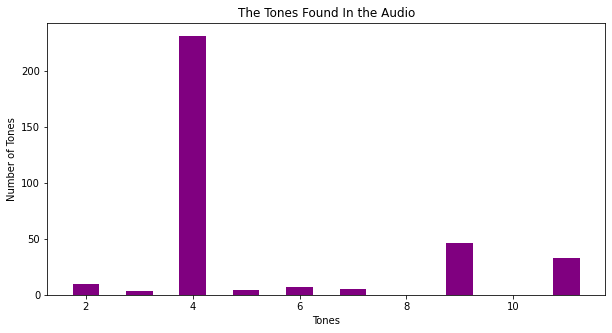

In [8]:
xs = list(singleNotes)
ys = list(percentages)
fig = plt.figure(figsize = (10, 5))
plt.bar(xs, ys, width = 0.5, color = "purple")
plt.xlabel("Tones")
plt.ylabel("Number of Tones")
plt.title("The Tones Found In the Audio")

In [9]:
#This function takes the percentages and starts to eliminate some of the notes depending on their prevalence. For example,
#if there are instances of all 12 chromatic tones but there is only one "11", 11 will most likely be eliminated. This function
#is good for arrays that have a lot of different kinds of notes. 
def topNotesWithMoreData(percentages, sortedPercentages, singleNotes):
    #These three lines are for arrays that are 4 or smaller. 
    topNotes = singleNotes
    topNums = sortedPercentages
    topNotesSorted = np.sort(topNotes)
    
    if (percentages.size == 5):
        #This takes the tones with the top 3 numbers. If there are equal numbers, it will take as many as it can in
        #the order that they occur. 
        topNums = np.array([sortedPercentages[0], sortedPercentages[1], sortedPercentages[2]])
        #This finds where those numbers are in the percentages array.
        indices = np.concatenate([np.where(percentages == sortedPercentages[0])[0], np.where(percentages == sortedPercentages[1])[0], np.where(percentages == sortedPercentages[2])[0]])
        #The next few lines remove the duplicate indices.
        indices = list(indices)
        df = pd.DataFrame({'col': indices})
        df.drop_duplicates(inplace=True)
        indices = df['col'].tolist()
        indices = np.asarray(indices)
        #This finds the top notes based on the top percentages.
        topNotes = np.array([singleNotes[indices[0]], singleNotes[indices[1]], singleNotes[indices[2]]])
        #This sorts the top notes.
        topNotesSorted = np.sort(topNotes)
    elif (percentages.size == 6):
        #This takes the tones with the top 4 numbers.
        topNums = np.array([sortedPercentages[0], sortedPercentages[1], sortedPercentages[2], sortedPercentages[3]])
        indices = np.concatenate([np.where(percentages == sortedPercentages[0])[0], np.where(percentages == sortedPercentages[1])[0], np.where(percentages == sortedPercentages[2])[0], np.where(percentages == sortedPercentages[3])[0]])
        indices = list(indices)
        df = pd.DataFrame({'col': indices})
        df.drop_duplicates(inplace=True)
        indices = df['col'].tolist()
        indices = np.asarray(indices)
        topNotes = np.array([singleNotes[indices[0]], singleNotes[indices[1]], singleNotes[indices[2]], singleNotes[indices[3]]])
        topNotesSorted = np.sort(topNotes)
    elif (percentages.size >= 7):
        #This takes the tones with the top 5 numbers.
        topNums = np.array([sortedPercentages[0], sortedPercentages[1], sortedPercentages[2], sortedPercentages[3], sortedPercentages[4]])
        indices = np.concatenate([np.where(percentages == sortedPercentages[0])[0], np.where(percentages == sortedPercentages[1])[0], np.where(percentages == sortedPercentages[2])[0], np.where(percentages == sortedPercentages[3])[0], np.where(percentages == sortedPercentages[4])[0]])
        indices = list(indices)
        df = pd.DataFrame({'col': indices})
        df.drop_duplicates(inplace=True)
        indices = df['col'].tolist()
        indices = np.asarray(indices)
        topNotes = np.array([singleNotes[indices[0]], singleNotes[indices[1]], singleNotes[indices[2]], singleNotes[indices[3]], singleNotes[indices[4]]])
        topNotesSorted = np.sort(topNotes)
    return topNotesSorted, topNotes, topNums

In [10]:
#This is similar to the function above, but it's used if we have too many notes to find a scale.
def topNotesWithLessData(percentages, sortedPercentages, singleNotes):
    topNotes = singleNotes
    topNums = sortedPercentages
    topNotesSorted = np.sort(topNotes)
    if (percentages.size == 5):
        topNums = np.array([sortedPercentages[0], sortedPercentages[1], sortedPercentages[2]])
        indices = np.concatenate([np.where(percentages == sortedPercentages[0])[0], np.where(percentages == sortedPercentages[1])[0], np.where(percentages == sortedPercentages[2])[0]])
        indices = list(indices)
        df = pd.DataFrame({'col': indices})
        df.drop_duplicates(inplace=True)
        indices = df['col'].tolist()
        indices = np.asarray(indices)
        topNotes = np.array([singleNotes[indices[0]], singleNotes[indices[1]], singleNotes[indices[2]]])
        topNotesSorted = np.sort(topNotes)
    elif (percentages.size == 6):
        topNums = np.array([sortedPercentages[0], sortedPercentages[1], sortedPercentages[2], sortedPercentages[3]])
        indices = np.concatenate([np.where(percentages == sortedPercentages[0])[0], np.where(percentages == sortedPercentages[1])[0], np.where(percentages == sortedPercentages[2])[0], np.where(percentages == sortedPercentages[3])[0]])
        indices = list(indices)
        df = pd.DataFrame({'col': indices})
        df.drop_duplicates(inplace=True)
        indices = df['col'].tolist()
        indices = np.asarray(indices)
        topNotes = np.array([singleNotes[indices[0]], singleNotes[indices[1]], singleNotes[indices[2]], singleNotes[indices[3]]])
        topNotesSorted = np.sort(topNotes)
    elif (percentages.size >= 7):
        topNums = np.array([sortedPercentages[0], sortedPercentages[1], sortedPercentages[2], sortedPercentages[3], sortedPercentages[4]])
        indices = np.concatenate([np.where(percentages == sortedPercentages[0])[0], np.where(percentages == sortedPercentages[1])[0], np.where(percentages == sortedPercentages[2])[0], np.where(percentages == sortedPercentages[3])[0]])
        indices = list(indices)
        df = pd.DataFrame({'col': indices})
        df.drop_duplicates(inplace=True)
        indices = df['col'].tolist()
        indices = np.asarray(indices)
        topNotes = np.array([singleNotes[indices[0]], singleNotes[indices[1]], singleNotes[indices[2]], singleNotes[indices[3]]])
        topNotesSorted = np.sort(topNotes)
    return topNotesSorted, topNotes, topNums

In [11]:
#Again, this eliminates even more notes for us to find a scale.
def topNotesWithEvenLessData(percentages, sortedPercentages, singleNotes):
    topNotes = singleNotes
    topNums = sortedPercentages
    topNotesSorted = np.sort(topNotes)
    if (percentages.size > 4):
        topNums = np.array([sortedPercentages[0], sortedPercentages[1], sortedPercentages[2]])
        indices = np.concatenate([np.where(percentages == sortedPercentages[0])[0], np.where(percentages == sortedPercentages[1])[0], np.where(percentages == sortedPercentages[2])[0]])
        indices = list(indices)
        df = pd.DataFrame({'col': indices})
        df.drop_duplicates(inplace=True)
        indices = df['col'].tolist()
        indices = np.asarray(indices)
        topNotes = np.array([singleNotes[indices[0]], singleNotes[indices[1]], singleNotes[indices[2]]])
        topNotesSorted = np.sort(topNotes)
    return topNotesSorted, topNotes, topNums

In [12]:
#Here is an example of using the first function. It gives you the top numbers, the top notes, and the top notes sorted.
[notesAfterElimination, topNotes, topNums] = topNotesWithMoreData(percentages, sortedPercentages, singleNotes)
print(notesAfterElimination)
print(topNotes)
print(topNums)

[ 2.  4.  6.  9. 11.]
[ 4.  9. 11.  2.  6.]
[231.  46.  33.  10.   7.]


In [13]:
#Right here, we define all of the scales based on pitch classes. We put them in order in terms of numbers, not actual tonics.
#For example, the tonic of C sharp is 1, but we put the 0 first. 
cScale = np.array([0, 2, 4, 5, 7, 9, 11])
cSharpScale = np.array([0, 1, 3, 5, 6, 8, 10])
dScale = np.array([1, 2, 4, 6, 7, 9, 11])
eFlatScale = np.array([0, 2, 3, 5, 7, 8, 10])
eScale = np.array([1, 3, 4, 6, 8, 9, 11])
fScale = np.array([0, 2, 4, 5, 7, 9, 10])
fSharpScale = np.array([1, 3, 5, 6, 8, 10, 11])
gScale = np.array([0, 2, 4, 6, 7, 9, 11])
aFlatScale = np.array([0, 1, 3, 5, 7, 8, 10])
aScale = np.array([1, 2, 4, 6, 8, 9, 11])
bFlatScale = np.array([0, 2, 3, 5, 7, 9, 10])
bScale = np.array([1, 3, 4, 6, 8, 10, 11])


cmScale = np.array([0, 2, 3, 5, 7, 8, 11])
cSharpmScale = np.array([0, 1, 3, 4, 6, 8, 9])
dmScale = np.array([1, 2, 4, 5, 7, 9, 10])
eFlatmScale = np.array([2, 3, 5, 6, 8, 10, 11])
emScale = np.array([0, 2, 4, 6, 7, 9, 11])
fmScale = np.array([0, 1, 4, 5, 7, 8, 10])
fSharpmScale = np.array([1, 2, 5, 6, 8, 9, 11])
gmScale = np.array([0, 2, 3, 6, 7, 9, 10])
aFlatmScale = np.array([1, 3, 4, 7, 8, 10, 11])
amScale = np.array([0, 2, 4, 5, 8, 9, 11])
bFlatmScale = np.array([0, 1, 3, 5, 6, 9, 10])
bmScale = np.array([1, 2, 4, 6, 7, 10, 11])

#This consolidates all the arrays into another array.
scales = np.array([cScale, cSharpScale, dScale, eFlatScale, eScale, fScale, fSharpScale, gScale, aFlatScale, aScale, bFlatScale, bScale, cmScale, cSharpmScale, dmScale, eFlatmScale, emScale, fmScale, fSharpmScale, gmScale, aFlatmScale, amScale, bFlatmScale, bmScale])
#This is used when we want to display the names of scales instead of the numbers.
scaleNames = np.array(["cScale", "cSharpScale", "dScale", "eFlatScale", "eScale", "fScale", "fSharpScale", "gScale", "aFlatScale", "aScale", "bFlatScale", "bScale", "cmScale", "cSharpmScale", "dmScale", "eFlatmScale", "emScale", "fmScale", "fSharpmScale", "gmScale", "aFlatmScale", "amScale", "bFlatmScale", "bmScale"])

In [14]:
#This is our main algorithm that tries to determine the scale. It uses many loops to go through and see if every note in
#our array from the audio is present in different keys. 
def findScales(scales, notesAfterElimination, scaleNames, topNums, topNotes):
    #sets empty arrays
    possibleKeys = np.array([])
    tonics = np.array([])
    indices = np.array([])
    percents = np.array([])
    #This goes through each scale
    for i in range(int(scales.size / 7)):
        #This goes through each tone we found
        for j in range(notesAfterElimination.size):
            #This goes through each note in each scale
            for k in range(7):
                #resets to not finding the note
                noteFound = False
                #checks each note in scale and exits if it finds it
                if (notesAfterElimination[j] == scales[i][k]):
                    noteFound = True
                    break
            #If the note isn't found, that means that that can't be the right scale, so we break and go on to the next scale.
            if (noteFound == False):
                break
            #If it gets to the end of our array, that means it found a scale that works.
            elif (j == notesAfterElimination.size - 1):
                #scale
                name = np.array([scaleNames[i]])
                #all scales
                possibleKeys = np.concatenate([possibleKeys, name])
                #tonic of the scale
                tonic = np.array([i])
                #tonics of all the scales
                tonics = np.concatenate([tonics, tonic])
    #After it finishes going through all the scales, it finds the number of the notes that we got from the chromogram.
    for h in range(tonics.size):
        #the index of the tonic
        index = np.where(topNotes == tonics[h] % 12)
        #turn it into an array
        index = np.array(index[0])
        #if it's not found, set the number to 0
        if (index.size == 0):
            index = np.array([0])
            percent = np.array([0])
        #otherwise, set the number
        else:
            percent = topNums[index]
        #add to the arrays
        indices = np.concatenate([indices, index])
        percents = np.concatenate([percents, percent])
    return possibleKeys, tonics, percents

In [15]:
#Here is an example of calling the function.
[possibleScales, tonics, percents] = findScales(scales, notesAfterElimination, scaleNames, topNums, topNotes)
print(possibleScales)
#The tonics are based on a system that goes from 0 - 23. We did this so that we could separate major and minor scales (because)
#they have the same tonics. 
actualTonics = (tonics % 12)
print(actualTonics)
print(percents)

['dScale' 'gScale' 'aScale' 'emScale']
[2. 7. 9. 4.]
[ 10.   0.  46. 231.]


Text(0.5, 1.0, 'The Number of The Tonics of Each Possible Scale')

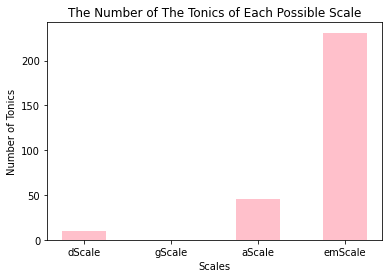

In [16]:
xs2 = list(possibleScales)
ys2 = list(percents)
plt.bar(xs2, ys2, width = 0.5, color = "pink")
plt.xlabel("Scales")
plt.ylabel("Number of Tonics")
plt.title("The Number of The Tonics of Each Possible Scale")

In [17]:
#This is a supplementary function that is only sometimes used. If there are multiple scales left and we need to 
#distinguish between major and minor, the mediants tell us the mode (4 semitones up for major, 3 for minor).
def findMediants(tonics):
    mediants = np.array([])
    for i in range(tonics.size):
        if (tonics[i] < 12):
            mediant = np.array([(tonics[i] + 4) % 12])
            mediants = np.concatenate([mediants, mediant])
        else:
            mediant = np.array([(tonics[i] + 3) % 12])
            mediants = np.concatenate([mediants, mediant])
    return mediants

In [18]:
#Here is an example
mediants = findMediants(tonics)
print(mediants)

[ 6. 11.  1.  7.]


In [19]:
#This function is used if there are multiple tonics found in the original note array we had earlier. It sorts the tonics
#based on their prevalence. 
def finalize(names, percents, scaleRate):
    #sort the percents and get the indices
    percentIndices = percents.argsort()
    #set the percents in order
    sortedPercents = percents[percentIndices[::-1]]
    #sort the tonics in the same way
    sortedActualTonics = scaleRate[percentIndices[::-1]]
    #sort the scales in the same way
    ratedScales = names[percentIndices[::-1]]
    return ratedScales

In [20]:
#This function is used if we need to eliminate more keys. It contains the findMediants and finalize functions. It goes through and finds
#tonics, then it finds mediants, and then it puts all of the scales in the order found. 
def rateScales(actualTonics, notesAfterElimination, possibleScales, tonics, percents):
    #defines empty arrays
    scaleRate = np.array([])
    names = np.array([])
    indices = np.array([])
    leftover = np.array([])
    #this goes through the number of tonics
    for i in range(actualTonics.size):
        #this goes through our notes we got from the audio
        for j in range(notesAfterElimination.size):
            #If we find a tonic, add it to the array. Add the number of that tonic as well
            if (actualTonics[i] == notesAfterElimination[j]):
                tonic = np.array([actualTonics[i]])
                name = np.array([possibleScales[i]])
                index = np.array([i])
                indices = np.concatenate([indices, index])
                scaleRate = np.concatenate([scaleRate, tonic])
                names = np.concatenate([names, name])
    #if there are multiple or one tonic          
    if (indices.size != 0):
        #shorten the percentage array (the one that holds the number of numbers)
        updatedPercents = np.zeros(indices.size)
        #go through the indices and put the percentages in the new array
        for e in range(indices.size):
            updatedPercents[e] = percents[indices[e].astype(int)]
        #sort them by using the finalize function
        names = finalize(names, updatedPercents, scaleRate)
    #otherwise, there are no tonics so we need to see what is leftover
    indices = indices.astype(int)
    #This deletes the scales we already sorted in the first part of the function
    leftover = np.delete(possibleScales, [list(indices)])
    leftoverTonics = np.delete(tonics, [list(indices)])    
    #if there are leftovers (ones we haven't sorted, look for mediants)
    if (leftover.size > 0):
        #calls the findMediants function
        mediants = findMediants(leftoverTonics)
        #Goes through the mediant array
        for i in range(mediants.size):
            #finds the indices where the mediant is in the original array
            arr = np.array(np.where(notesAfterElimination == mediants[i]))
            #if it finds some, then it adds the next scale to the array
            if (arr.size > 0):
                nextScale = np.array([leftoverTonics[i]])
                index = np.where(tonics == nextScale)
                nextScale = possibleScales[index]
                #then it decrements i because the array will be shortened
                if (i > 0):
                    i = i - 1
                leftover = np.delete(leftover, i)
                names = np.concatenate([names, nextScale])
    #Then it justs adds on any extra scales that were left.
    if (names.size < possibleScales.size):
        names = np.concatenate([names, leftover])
    return names

In [21]:
#here is an example
rScales = rateScales(actualTonics, notesAfterElimination, possibleScales, tonics, percents)

In [22]:
#This is the function that you can call that combines everything into one big algorithm. You can feed in an audio file and it
#will go through all of the functions.
def callingAllFunctions(file):
    [x, fs] = loadAudio(file)
    
    notes = getNotesFromAudio(x)
    singleNotes = getSingleNotesFromAudio(x)
    percentages = findPercentages(notes)
    sortedPercentages = np.sort(percentages)[::-1]
    
    #graph it!
    [fig, axis] = plt.subplots(2, figsize = (10, 12))
    fig.tight_layout(pad = 5.0)
    xs = list(singleNotes)
    ys = list(percentages)
    #fig = plt.figure(figsize = (10, 5))
    axis[0].bar(xs, ys, width = 0.5, color = "purple")
    axis[0].set(xlabel = "Tones", ylabel = "Number of Tones")
    axis[0].set_title("The Tones Found In the Audio")
    
    
    #starts by getting the most notes possible
    [notesAfterElimination, topNotes, topNums] = topNotesWithMoreData(percentages, sortedPercentages, singleNotes)
    
    cScale = np.array([0, 2, 4, 5, 7, 9, 11])
    cSharpScale = np.array([0, 1, 3, 5, 6, 8, 10])
    dScale = np.array([1, 2, 4, 6, 7, 9, 11])
    eFlatScale = np.array([0, 2, 3, 5, 7, 8, 10])
    eScale = np.array([1, 3, 4, 6, 8, 9, 11])
    fScale = np.array([0, 2, 4, 5, 7, 9, 10])
    fSharpScale = np.array([1, 3, 5, 6, 8, 10, 11])
    gScale = np.array([0, 2, 4, 6, 7, 9, 11])
    aFlatScale = np.array([0, 1, 3, 5, 7, 8, 10])
    aScale = np.array([1, 2, 4, 6, 8, 9, 11])
    bFlatScale = np.array([0, 2, 3, 5, 7, 9, 10])
    bScale = np.array([1, 3, 4, 6, 8, 10, 11])


    cmScale = np.array([0, 2, 3, 5, 7, 8, 11])
    cSharpmScale = np.array([0, 1, 3, 4, 6, 8, 9])
    dmScale = np.array([1, 2, 4, 5, 7, 9, 10])
    eFlatmScale = np.array([2, 3, 5, 6, 8, 10, 11])
    emScale = np.array([0, 2, 4, 6, 7, 9, 11])
    fmScale = np.array([0, 1, 4, 5, 7, 8, 10])
    fSharpmScale = np.array([1, 2, 5, 6, 8, 9, 11])
    gmScale = np.array([0, 2, 3, 6, 7, 9, 10])
    aFlatmScale = np.array([1, 3, 4, 7, 8, 10, 11])
    amScale = np.array([0, 2, 4, 5, 8, 9, 11])
    bFlatmScale = np.array([0, 1, 3, 5, 6, 9, 10])
    bmScale = np.array([1, 2, 4, 6, 7, 10, 11])

    scales = np.array([cScale, cSharpScale, dScale, eFlatScale, eScale, fScale, fSharpScale, gScale, aFlatScale, aScale, bFlatScale, bScale, cmScale, cSharpmScale, dmScale, eFlatmScale, emScale, fmScale, fSharpmScale, gmScale, aFlatmScale, amScale, bFlatmScale, bmScale])
    scaleNames = np.array(["cScale", "cSharpScale", "dScale", "eFlatScale", "eScale", "fScale", "fSharpScale", "gScale", "aFlatScale", "aScale", "bFlatScale", "bScale", "cmScale", "cSharpmScale", "dmScale", "eFlatmScale", "emScale", "fmScale", "fSharpmScale", "gmScale", "aFlatmScale", "amScale", "bFlatmScale", "bmScale"])
    
    [possibleScales, tonics, percents] = findScales(scales, notesAfterElimination, scaleNames, topNums, topNotes)
    
    #if it ends up producing not scales, then we try the function that eliminates more tones in the first place
    if (possibleScales.size == 0):
        [notesAfterElimination, topNotes, topNums] = topNotesWithLessData(percentages, sortedPercentages, singleNotes)
        [possibleScales, tonics, percents] = findScales(scales, notesAfterElimination, scaleNames, topNums, topNotes)
        #If that happens again, we try the function that eliminates even more tones.
        if (possibleScales.size == 0):
            [notesAfterElimination, topNotes, topNums] = topNotesWithEvenLessData(percentages, sortedPercentages, singleNotes)
            [possibleScales, tonics, percents] = findScales(scales, notesAfterElimination, scaleNames, topNums, topNotes)
    
    #graph it!
    xs2 = list(possibleScales)
    ys2 = list(percents)
    axis[1].bar(xs2, ys2, width = 0.5, color = "pink")
    axis[1].set(xlabel = "Scales", ylabel = "Number of Tonics")
    axis[1].set_title("The Number of The Tonics of Each Possible Scale")
    
    actualTonics = (tonics % 12)
    final = rateScales(actualTonics, notesAfterElimination, possibleScales, tonics, percents)
    return final

['emScale' 'aScale' 'dScale' 'gScale']


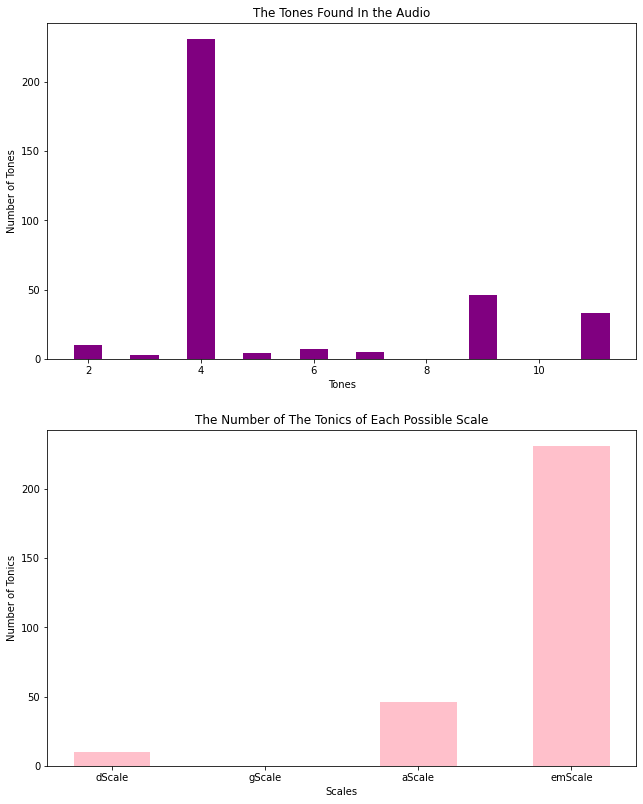

In [23]:
#Here is the final answer which will contain 1 - 5 possible scales in order of most likely to least likely. 
final = callingAllFunctions("TheBlackKeys_track4.wav")
print(final)